In [1]:
!pip install tmdbsimple

In [233]:
import tmdbsimple as tmdb
import json
import time
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
tmdb.API_KEY = 'd75c96262f3b0b68f3c56e2973ff71a9'

In [634]:
iterations = list(range(15, 3000))

In [576]:
conteiner = []
for i in iterations:
    if i not in ids:
        try:
            movie = tmdb.Movies(i)
            response = movie.info()
            #movie_tuple = (movie.title, movie.id, movie.release_date, movie.popularity, movie.budget, movie.genres[0]['name'], movie.genres[1]['name'], movie.revenue, movie.vote_average, movie.vote_count, movie.imdb_id)
            conteiner.append(response)

        except: 
            continue
        time.sleep(2)

In [155]:
len(conteiner)

1000

In [42]:
def parse_data(movie_data):
    contein = []
    for data in movie_data:
        if 'title' not in data.keys():
            data.setdefault('title', None)
        if 'id' not in data.keys():
            data.setdefault('id', None)
        if 'release_date' not in data.keys():
            data.setdefault('release_date', None)
        if 'popularity' not in data.keys():
            data.setdefault('popularity', None)
        if 'budget' not in data.keys():
            data.setdefault('budget', None)
        if 'genres' not in data.keys():
            data.setdefault('genres', None)
        if 'revenue' not in data.keys():
            data.setdefault('revenue', None)
        if 'vote_average' not in data.keys():
            data.setdefault('vote_average', None)
        if 'vote_count' not in data.keys():
            data.setdefault('vote_count', None)
        if 'imdb_id' not in data.keys():
            data.setdefault('imdb_id', None)
            
        movie_tuple = (data['title'], data['id'], data['release_date'], data['popularity'], data['budget'], data['genres'][0]['name'], data['revenue'], data['vote_average'], data['vote_count'], data['imdb_id'])
        contein.append(movie_tuple)
    return contein

In [574]:
ids = []
for d in movie_base1:
    ids.append(d['id'])
len(ids)

782

In [699]:
#backup = parsed_data
#backup1 = parsed_data
#backup2 = parsed_data

In [5]:
import mysql.connector
from mysql.connector import errorcode

In [711]:
# cnx = mysql.connector .connect(
#     host = "flatiron.cyalaonkhzjk.us-east-2.rds.amazonaws.com",
#     user = "Askhat",
#     passwd = "rnjNFRJQ312"
# )

In [712]:
cursor = cnx.cursor()

In [6]:
### CONNECTION TO DATABASE

In [179]:
import mysql.connector
import movie_config

In [180]:
cnx = mysql.connector.connect(host = movie_config.host, user = movie_config.user, passwd = movie_config.pwd)
cursor = cnx.cursor() 
cnx.database = 'movies'

In [181]:
cursor.execute('''USE movies''')

In [10]:
cursor.execute("""
                SELECT imdbID FROM movies.movies_all""")

lis = cursor.fetchall()

In [158]:
len(lis)

1000

In [189]:
cnx.commit()

In [183]:

# stmt = """
#         INSERT INTO movies_all2 (title, movieID2, release_date, popularity, budget, genre, revenue, vote_avg, vote_count, imdbID) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s)
#         """
# cursor.executemany(stmt, third)
# cnx.commit()


In [13]:
import requests

In [38]:
conteiner = []
for i in lis:
    try:
        url = f"https://api.themoviedb.org/3/movie/{i[0]}?api_key=d75c96262f3b0b68f3c56e2973ff71a9"
        payload = "{}"
        response = requests.request("GET", url, data=payload)
        r = response.json()
        conteiner.append(r)

    except: 
        continue


In [66]:
conteiner

[{'adult': False,
  'backdrop_path': '/j9XKiZrVeViAixVRzCta7h1VU9W.jpg',
  'belongs_to_collection': None,
  'budget': 25000000,
  'genres': [{'id': 18, 'name': 'Drama'}, {'id': 80, 'name': 'Crime'}],
  'homepage': None,
  'id': 278,
  'imdb_id': 'tt0111161',
  'original_language': 'en',
  'original_title': 'The Shawshank Redemption',
  'overview': 'Framed in the 1940s for the double murder of his wife and her lover, upstanding banker Andy Dufresne begins a new life at the Shawshank prison, where he puts his accounting skills to work for an amoral warden. During his long stretch in prison, Dufresne comes to be admired by the other inmates -- including an older prisoner named Red -- for his integrity and unquenchable sense of hope.',
  'popularity': 35.464,
  'poster_path': '/9O7gLzmreU0nGkIB6K3BsJbzvNv.jpg',
  'production_companies': [{'id': 97,
    'logo_path': '/7znWcbDd4PcJzJUlJxYqAlPPykp.png',
    'name': 'Castle Rock Entertainment',
    'origin_country': 'US'}],
  'production_count

In [88]:
mo = []

for i in conteiner:
    try:
        if 'status_code' not in i.keys():
            mo.append(i)
    except:
        continue

In [161]:
len(mo)

972

In [167]:
#first = parse_data(mo[0:693])

In [168]:
#second = parse_data(mo[694:1000])

In [166]:
#third;

In [209]:
cursor.execute("""SELECT *
FROM movies.movies_all a
JOIN movies.movies_all2 b ON
a.imdbID = b.imdbID;""");

df = pd.DataFrame(cursor.fetchall())
df.columns = [i[0] for i in cursor.description]
df.head()

,movieID,title,genres,director,actors,metascore,imdb_rating,imdbID,production,title,movieID2,release_date,popularity,budget,genre,revenue,vote_avg,vote_count,imdbID
0,1,The Shawshank Redemption,Drama,Frank Darabont,"Tim Robbins, Morgan Freeman, Bob Gunton, Willi...",80.0,9.3,tt0111161,Columbia Pictures,The Shawshank Redemption,278,1994-09-23,35.464,25000000,Drama,2.834150e+07,8.7,14400,tt0111161
1,2,The Godfather,"Crime, Drama",Francis Ford Coppola,"Marlon Brando, Al Pacino, James Caan, Richard ...",100.0,9.2,tt0068646,Paramount Pictures,The Godfather,238,1972-03-14,30.990,6000000,Drama,2.450660e+08,8.6,11033,tt0068646
2,3,The Dark Knight,"Action, Crime, Drama, Thriller",Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart, M...",84.0,9.0,tt0468569,Warner Bros. Pictures/Legendary,The Dark Knight,155,2008-07-16,42.304,185000000,Drama,1.004560e+09,8.4,20399,tt0468569
3,4,The Godfather: Part II,"Crime, Drama",Francis Ford Coppola,"Al Pacino, Robert Duvall, Diane Keaton, Robert...",90.0,9.0,tt0071562,Paramount Pictures,The Godfather: Part II,240,1974-12-20,28.912,13000000,Drama,1.026000e+08,8.5,6479,tt0071562
4,5,The Lord of the Rings: The Return of the King,"Adventure, Drama, Fantasy",Peter Jackson,"Noel Appleby, Ali Astin, Sean Astin, David Aston",94.0,8.9,tt0167260,New Line Cinema,The Lord of the Rings: The Return of the King,122,2003-12-01,35.139,94000000,Adventure,1.118890e+09,8.4,14214,tt0167260


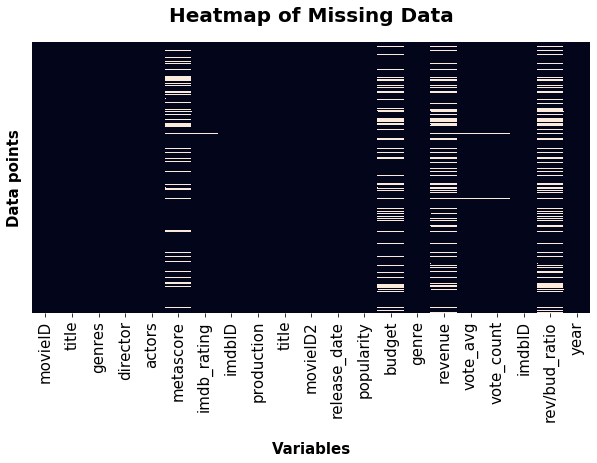

In [697]:
#graphically see the missing data

fig, ax = plt.subplots(figsize=(10, 5))
ax = sns.heatmap(df.isna(), cbar=False)
#plt.xlim(xmax=20)
#plt.grid(axis='y', alpha=0.75, linestyle='-', linewidth=0.2)
plt.xlabel('Variables', fontsize=15, labelpad=20, fontweight='bold')
plt.ylabel('Data points',  labelpad=10, fontsize=15, fontweight='bold')
plt.title('Heatmap of Missing Data', pad=20, fontsize=20, fontweight='bold')
plt.xticks(fontsize=15);
ax.yaxis.set_ticks(np.arange(0, 100, 100));
fig.savefig('Heatmap.jpg', bbox_inches='tight')

In [375]:
df = df.replace(0, np.nan)

In [376]:
df.isna().mean()

movieID          0.000000
title            0.000000
genres           0.000000
director         0.000000
actors           0.000000
metascore        0.168205
imdb_rating      0.001026
imdbID           0.000000
production       0.000000
title            0.000000
movieID2         0.000000
release_date     0.000000
popularity       0.000000
budget           0.191795
genre            0.000000
revenue          0.194872
vote_avg         0.002051
vote_count       0.002051
imdbID           0.000000
rev/bud_ratio    0.256410
year             0.000000
dtype: float64

In [269]:
group = df.groupby('director')['imdb_rating'].mean()
group
#means = df.groupby('director')['popularity'].mean().values

director
Abdellatif Kechiche    7.800000
Adam Elliot            8.100000
Adam McKay             7.800000
Aditya Chopra          8.100000
Aditya Dhar            8.400000
                         ...   
Yôjirô Takita          8.100000
Zack Snyder            7.533333
Zaza Urushadze         8.200000
Zoya Akhtar            8.100000
Ömer Faruk Sorak       8.000000
Name: imdb_rating, Length: 546, dtype: float64

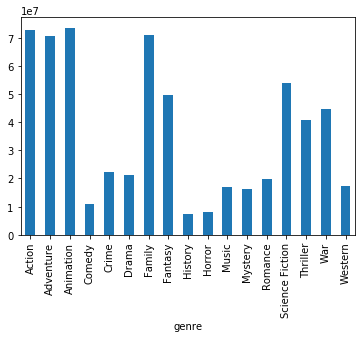

In [270]:
df.groupby('genre')['budget'].mean().plot(kind='bar')

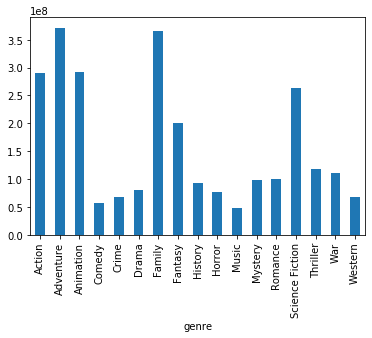

In [223]:
df.groupby('genre')['revenue'].mean().plot(kind='bar')

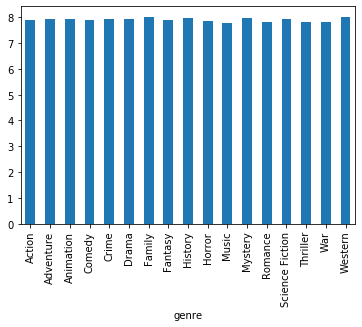

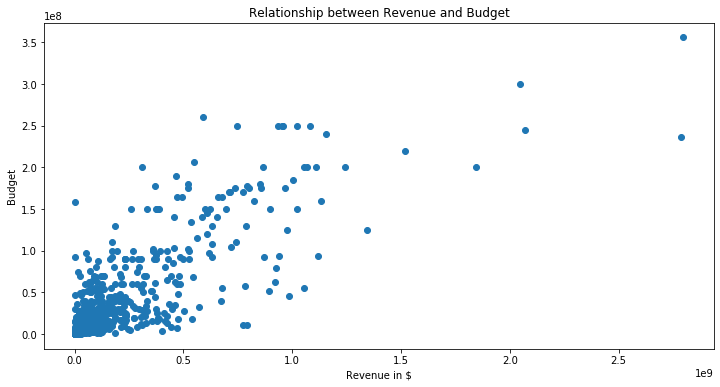

In [528]:
fig, ax = plt.subplots(figsize=(12, 6))

# Add data: "height", "weight" as x-y, index as color
ax.scatter(df["revenue"], df["budget"])

ax.set_xlabel("Revenue in $")
ax.set_ylabel("Budget")
ax.set_title('Relationship between Revenue and Budget')


plt.show()

In [273]:
df["rev/bud_ratio"] = (df["revenue"]/df["budget"])

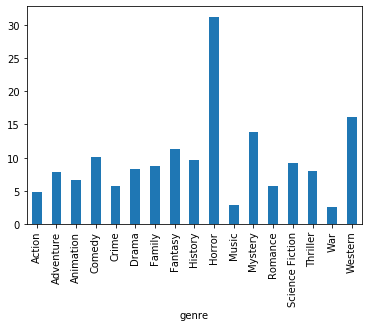

In [274]:
df.groupby('genre')['rev/bud_ratio'].mean().plot(kind='bar')

In [283]:
df['year'] = pd.DatetimeIndex(df['release_date']).year

In [284]:
df

,movieID,title,genres,director,actors,metascore,imdb_rating,imdbID,production,title,...,release_date,popularity,budget,genre,revenue,vote_avg,vote_count,imdbID,rev/bud_ratio,year
0,1,The Shawshank Redemption,Drama,Frank Darabont,"Tim Robbins, Morgan Freeman, Bob Gunton, Willi...",80.0,9.3,tt0111161,Columbia Pictures,The Shawshank Redemption,...,1994-09-23,35.464,25000000.0,Drama,2.834150e+07,8.7,14400.0,tt0111161,1.133660,1994
1,2,The Godfather,"Crime, Drama",Francis Ford Coppola,"Marlon Brando, Al Pacino, James Caan, Richard ...",100.0,9.2,tt0068646,Paramount Pictures,The Godfather,...,1972-03-14,30.990,6000000.0,Drama,2.450660e+08,8.6,11033.0,tt0068646,40.844333,1972
2,3,The Dark Knight,"Action, Crime, Drama, Thriller",Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart, M...",84.0,9.0,tt0468569,Warner Bros. Pictures/Legendary,The Dark Knight,...,2008-07-16,42.304,185000000.0,Drama,1.004560e+09,8.4,20399.0,tt0468569,5.430054,2008
3,4,The Godfather: Part II,"Crime, Drama",Francis Ford Coppola,"Al Pacino, Robert Duvall, Diane Keaton, Robert...",90.0,9.0,tt0071562,Paramount Pictures,The Godfather: Part II,...,1974-12-20,28.912,13000000.0,Drama,1.026000e+08,8.5,6479.0,tt0071562,7.892308,1974
4,5,The Lord of the Rings: The Return of the King,"Adventure, Drama, Fantasy",Peter Jackson,"Noel Appleby, Ali Astin, Sean Astin, David Aston",94.0,8.9,tt0167260,New Line Cinema,The Lord of the Rings: The Return of the King,...,2003-12-01,35.139,94000000.0,Adventure,1.118890e+09,8.4,14214.0,tt0167260,11.903085,2003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
970,994,The Town,"Crime, Drama, Thriller",Ben Affleck,"Ben Affleck, Rebecca Hall, Jon Hamm, Jeremy Re...",74.0,7.5,tt0840361,Warner Bros. Pictures,The Town,...,2010-09-15,14.325,37000000.0,Crime,1.540260e+08,7.1,2609.0,tt0840361,4.162865,2010
971,995,Kung Fu Panda,"Animation, Action, Adventure, Comedy, Family","Mark Osborne, John Stevenson","Jack Black, Dustin Hoffman, Angelina Jolie, Ia...",73.0,7.5,tt0441773,Paramount Pictures,Kung Fu Panda,...,2008-06-04,18.616,130000000.0,Adventure,6.317450e+08,7.1,6644.0,tt0441773,4.859577,2008
972,996,Munich,"Biography, Crime, Drama, History, Thriller",Steven Spielberg,"Eric Bana, Daniel Craig, Ciarán Hinds, Mathieu...",74.0,7.5,tt0408306,Universal Pictures,Munich,...,2005-12-23,12.359,70000000.0,Drama,1.303590e+08,7.1,1349.0,tt0408306,1.862271,2005
973,997,Kiss Kiss Bang Bang,"Action, Comedy, Crime, Mystery, Thriller",Shane Black,"Robert Downey Jr., Val Kilmer, Michelle Monagh...",72.0,7.5,tt0373469,Warner Bros. Pictures,Kiss Kiss Bang Bang,...,2005-09-05,17.283,15000000.0,Comedy,1.578510e+07,7.2,1529.0,tt0373469,1.052340,2005


In [303]:
#df.groupby('year')['rev/bud_ratio'].mean().plot(kind='bar')
#df.groupby('year')(df['year'] > 2000, ['rev/bud_ratio'].mean())
#df[df['year'] > 2000] #['rev/bud_ratio'].mean()
#df[df['gross'] <= above_3std]

In [313]:
decade = 10 * (df['year'] // 10)
decade = decade.astype(str) + 's'
decade.name = 'decade'
dec = df.groupby(['genre', decade])['rev/bud_ratio'].mean().unstack().fillna(0)
dec

decade,1920s,1930s,1940s,1950s,1960s,1970s,1980s,1990s,2000s,2010s
genre,,,,,,,,,,
Action,0.000000,1.958190,0.000000,3.308701,5.337302,10.695367,6.655845,3.433219,4.250629,4.721682
Adventure,2.708559,7.116192,1.133421,9.031282,12.076887,18.036169,11.497982,7.446470,5.423862,4.486016
Animation,0.000000,0.000000,36.543860,0.000000,0.000000,0.000000,3.337471,8.620894,5.608720,3.721036
Comedy,10.000000,6.752980,5.500000,5.992345,17.595697,14.472851,11.216437,11.357712,6.745209,6.892050
Crime,0.000000,0.000000,2.081388,6.175214,11.400741,10.739387,3.394964,4.648272,3.693915,5.995807
Drama,0.007022,37.301180,6.335677,8.134285,7.482483,21.164172,5.915602,5.682189,7.451069,7.389602
Family,0.000000,0.000000,0.000000,0.000000,0.000000,1.333333,0.000000,21.944089,0.000000,2.855897
Fantasy,0.000000,124.242235,0.000000,0.000000,0.000000,0.000000,2.710120,4.474649,4.272963,5.860518
History,0.000000,0.000000,0.000000,0.000000,0.000000,6.724567,0.000000,0.000000,0.000000,11.058677


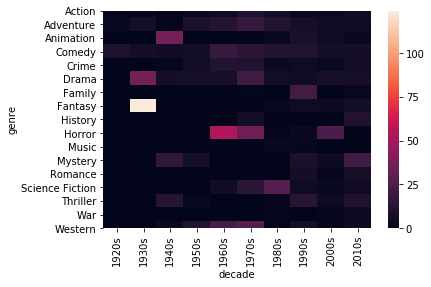

In [403]:
ax = sns.heatmap(dec)

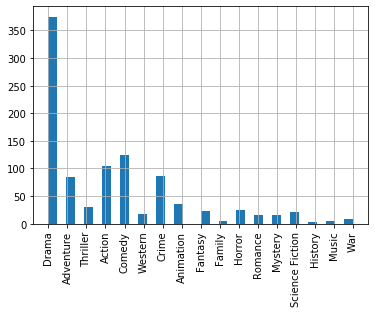

In [484]:
#df['imdb_rating'].hist(bins=40)
#df['revenue'].hist(bins=40)
#df['budget'].hist(bins=100)
df['genre'].hist(bins=34, xrot = 90)

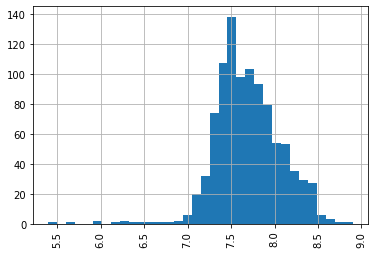

In [386]:
df['vote_avg'].hist(bins=34, xrot = 90)

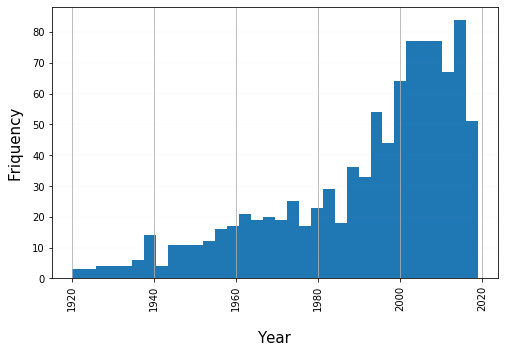

In [715]:
#df['year'].hist(bins=34, xrot = 90)

fig, ax = plt.subplots(figsize=(8, 5))
ax = df['year'].hist(bins=34, xrot = 90)
#plt.xlim(xmax=20)
plt.grid(axis='y', alpha=0.2, linestyle='-', linewidth=0.2)
plt.xlabel('Year', fontsize=15, labelpad=20)
plt.ylabel('Friquency',  labelpad=10, fontsize=15)
# plt.title('Heatmap of Missing Data', pad=20, fontsize=20, fontweight='bold')
# plt.xticks(fontsize=15);
# ax.yaxis.set_ticks(np.arange(0, 100, 100));
fig.savefig('Hist_Year.jpg', bbox_inches='tight')

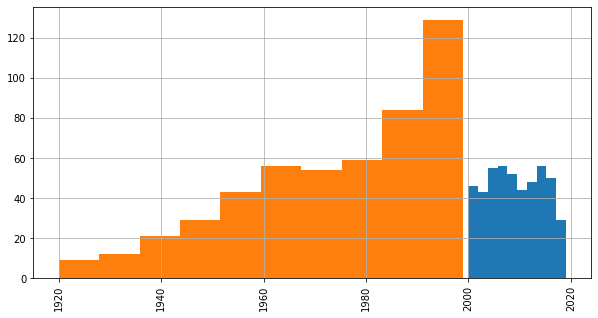

In [705]:
dff=df[df['year'] >= 2000]
dfs=df[df['year'] < 2000]
#graphically see the missing data

fig, ax = plt.subplots(figsize=(10, 5))
ax = dff['year'].hist(xrot = 90)
ax = dfs['year'].hist(xrot = 90)
#plt.xlim(xmax=20)
#plt.grid(axis='y', alpha=0.75, linestyle='-', linewidth=0.2)
# plt.xlabel('Variables', fontsize=15, labelpad=20, fontweight='bold')
# plt.ylabel('Data points',  labelpad=10, fontsize=15, fontweight='bold')
# plt.title('Heatmap of Missing Data', pad=20, fontsize=20, fontweight='bold')
# plt.xticks(fontsize=15);
# ax.yaxis.set_ticks(np.arange(0, 100, 100));
# fig.savefig('Heatmap.jpg', bbox_inches='tight')

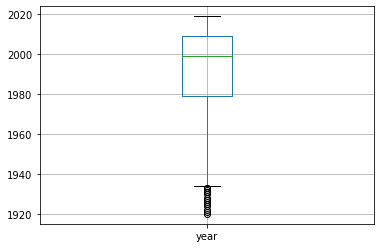

In [388]:
df.boxplot(['year'])

Text(0.5, 1.0, 'Histogram of Return on Investment')

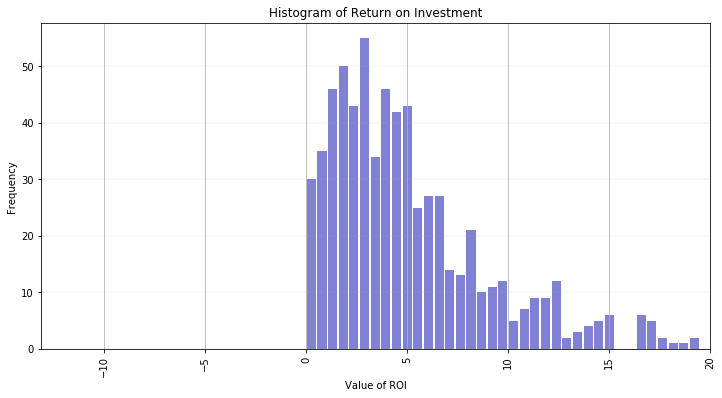

In [506]:
df['rev/bud_ratio'].hist(bins=500, xrot = 90, color='#0504aa',
                            alpha=0.5, rwidth=0.85, figsize=(12, 6))
# Set a clean upper x-axis limit.
plt.xlim(xmax=20)
plt.grid(axis='y', alpha=0.75, linestyle='-', linewidth=0.2)
plt.xlabel('Value of ROI')
plt.ylabel('Frequency')
plt.title('Histogram of Return on Investment')
#plt.text(23, 45, r'$\mu=15, b=3$')
#maxfreq = n.max()
# Set a clean upper y-axis limit.


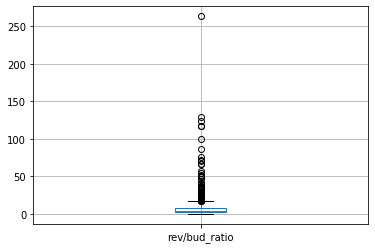

In [420]:
df.boxplot(['rev/bud_ratio'])

In [423]:
df_2 = df[df['year'] >= 2000]

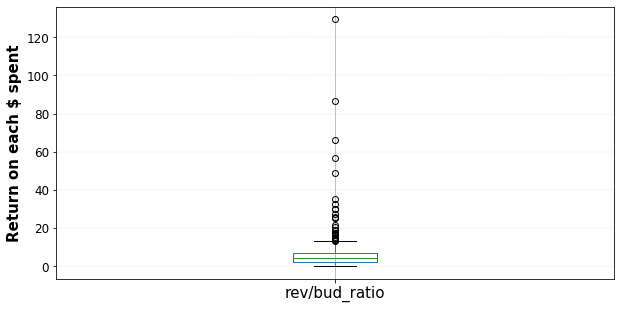

In [716]:
#df_2.boxplot(['rev/bud_ratio'], figsize=(12, 6));
fig, ax = plt.subplots(figsize=(10, 5))
ax = df_2.boxplot(['rev/bud_ratio'])
plt.grid(axis='y', alpha=0.5, linestyle='--', linewidth=0.3)
#plt.xlabel('Genre', fontsize=18, fontweight='bold')
plt.xticks(fontsize=15)
plt.ylabel('Return on each $ spent', fontsize=15, fontweight='bold')
plt.yticks(fontsize=12)
#plt.title('Average Return on Investment (ROI)',pad=15, fontsize=20, fontweight='bold');
fig.savefig('Boxplot.jpg', bbox_inches='tight')

In [456]:
df_2['rev/bud_ratio'].describe()

count    383.000000
mean       6.428993
std       10.183094
min        0.003820
25%        2.477305
50%        4.266450
75%        6.756380
max      129.440625
Name: rev/bud_ratio, dtype: float64

In [473]:
IQR = 6.756380 - 2.477305
c = IQR*1.5 + 6.428993
c

12.8476055

In [478]:
# Removing movies by ROI outliers 
df3 = df_2[df_2['rev/bud_ratio'] < c]

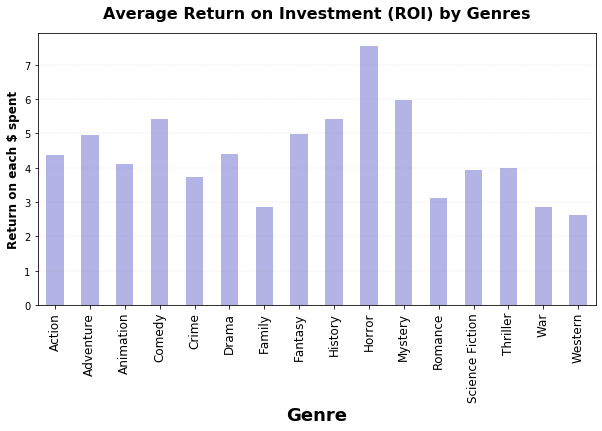

In [727]:
#ddd = df3.groupby('genre')['rev/bud_ratio'].mean().plot(kind='bar', color='#0504aa', alpha=0.3, figsize=(10, 6));
fig, ax = plt.subplots(figsize=(10, 5))
ax = df3.groupby('genre')['rev/bud_ratio'].mean().plot(kind='bar', color='#0504aa', alpha=0.3);

plt.grid(axis='y', alpha=0.5, linestyle='--', linewidth=0.3)
plt.xlabel('Genre', fontsize=18, fontweight='bold')
plt.xticks(fontsize=12)
plt.ylabel('Return on each $ spent', fontsize=12, fontweight='bold')
plt.yticks(fontsize=10)
plt.title('Average Return on Investment (ROI) by Genres', pad=15, fontsize=16, fontweight='bold');
fig.savefig('ROI.jpg', bbox_inches='tight')

In [569]:
most_genres = df3.groupby('genre')['rev/bud_ratio'].mean()
most_genres.sort_values(ascending=False)

genre
Horror             7.543125
Mystery            5.989423
History            5.434783
Comedy             5.418902
Fantasy            4.994579
Adventure          4.966962
Drama              4.415329
Action             4.359140
Animation          4.111064
Thriller           3.991085
Science Fiction    3.930676
Crime              3.734444
Romance            3.125635
War                2.857538
Family             2.855897
Western            2.610400
Name: rev/bud_ratio, dtype: float64

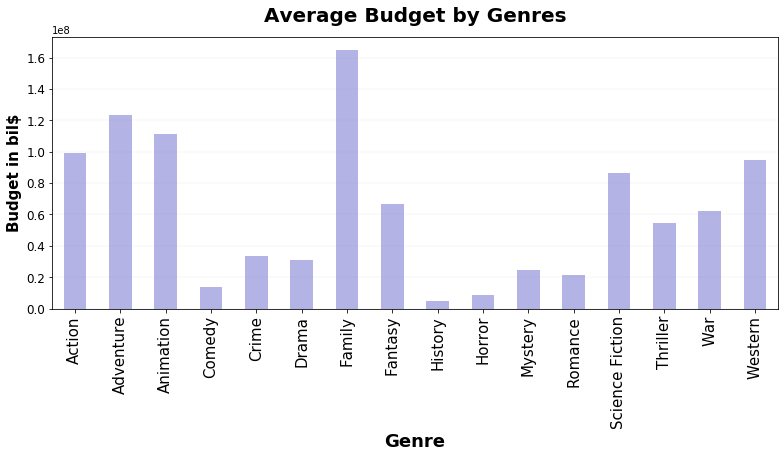

In [738]:
#df_2.groupby('genre')['budget'].mean().plot(kind='bar', color='#0504aa', alpha=0.3, figsize=(8, 5));


fig, ax = plt.subplots(figsize=(10, 5))
ax = df3.groupby('genre')['budget'].mean().plot(kind='bar', color='#0504aa', alpha=0.3, figsize=(13, 5));

plt.grid(axis='y', alpha=0.5, linestyle='--', linewidth=0.3)
plt.xlabel('Genre', fontsize=18, fontweight='bold')
plt.xticks(fontsize=15)
plt.ylabel('Budget in bil$', fontsize=15, fontweight='bold')
plt.yticks(fontsize=12);
plt.title('Average Budget by Genres', fontsize=20, pad = 15, fontweight='bold');
fig.savefig('Budget.jpg', bbox_inches='tight')

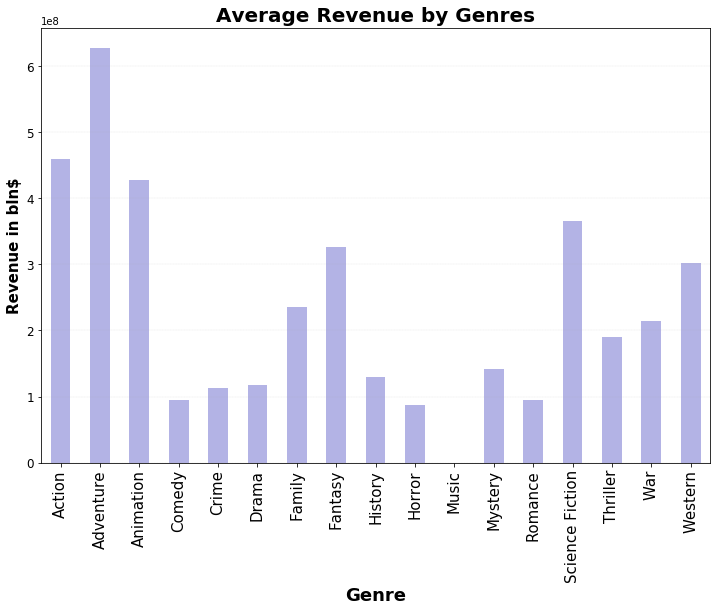

In [642]:
df_2.groupby('genre')['revenue'].mean().plot(kind='bar', color='#0504aa', alpha=0.3, figsize=(12, 8));

plt.grid(axis='y', alpha=0.5, linestyle='--', linewidth=0.3)
plt.xlabel('Genre', fontsize=18, fontweight='bold')
plt.xticks(fontsize=15)
plt.ylabel('Revenue in bln$', fontsize=15, fontweight='bold')
plt.yticks(fontsize=12)
plt.title('Average Revenue by Genres', fontsize=20, fontweight='bold');
#fig.savefig('test.jpg')

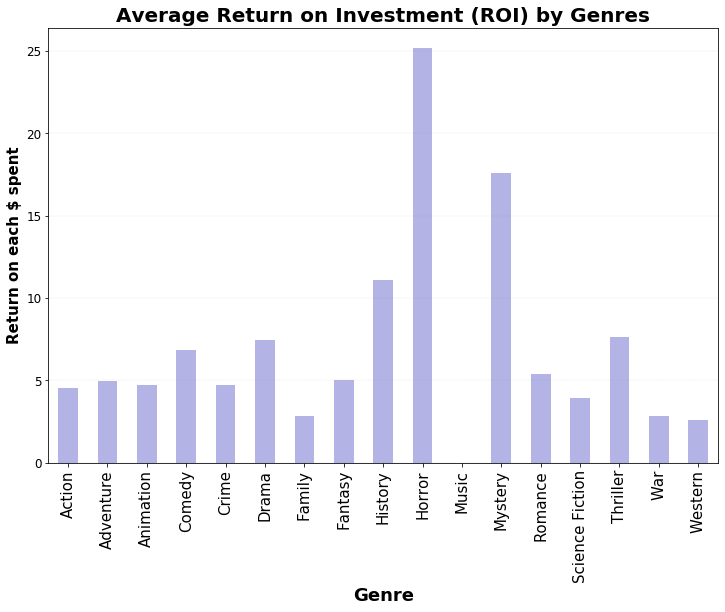

In [647]:
df_2.groupby('genre')['rev/bud_ratio'].mean().plot(kind='bar', color='#0504aa', alpha=0.3, figsize=(12, 8));

plt.grid(axis='y', alpha=0.5, linestyle='--', linewidth=0.3)
plt.xlabel('Genre', fontsize=18, fontweight='bold')
plt.xticks(fontsize=15)
plt.ylabel('Return on each $ spent', fontsize=15, fontweight='bold')
plt.yticks(fontsize=12)
plt.title('Average Return on Investment (ROI) by Genres', fontsize=20, fontweight='bold');
#fig.savefig('test.jpg')

In [448]:
dec2 = df_2.groupby(['genre', 'year'])['rev/bud_ratio'].mean().round(2).unstack().fillna(0)#.fillna('-')

In [449]:
dec2

year,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
genre,,,,,,,,,,,,,,,,,,,,
Action,3.60,2.11,2.43,6.03,4.54,3.23,3.02,6.41,6.63,6.34,3.38,3.73,4.27,2.09,2.68,5.78,9.39,5.43,5.39,7.07
Adventure,8.67,6.70,11.73,6.11,6.08,4.32,3.99,2.84,2.49,2.45,2.90,0.00,4.58,3.83,5.30,0.00,4.54,4.65,3.92,5.41
Animation,0.00,9.68,0.00,10.00,0.00,0.00,0.00,4.16,3.88,3.07,5.16,0.00,0.00,0.49,0.00,0.00,4.00,2.90,0.00,0.00
Comedy,0.00,10.40,1.73,11.33,0.00,2.43,6.55,6.07,2.30,7.51,0.00,4.90,4.18,8.10,6.32,4.76,9.13,11.26,0.00,0.00
Crime,1.64,1.57,1.12,5.48,0.00,1.45,4.13,3.45,2.05,10.20,4.16,0.00,6.88,3.23,5.92,4.33,3.13,7.33,8.89,9.60
Drama,7.72,4.53,4.41,8.50,4.85,6.25,6.39,15.90,5.85,6.50,8.62,13.90,4.59,4.85,5.14,4.12,9.39,4.61,10.48,4.93
Family,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.86,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Fantasy,0.00,0.21,0.00,0.00,6.75,0.00,4.85,0.00,2.23,0.00,4.66,7.89,0.00,0.00,4.20,0.00,0.00,0.00,0.00,0.00
History,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.43,16.68,0.00,0.00,0.00,0.00,0.00


In [516]:
dec3 = df3.groupby(['genre', 'year'])['rev/bud_ratio'].mean().round(2).unstack().fillna('-')

In [529]:
dec3.mean()

Series([], dtype: float64)

In [517]:
dec3

year,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
genre,,,,,,,,,,,,,,,,,,,,
Action,3.6,2.11,2.43,6.03,4.54,3.23,3.02,6.41,6.63,6.34,3.38,3.73,4.27,2.09,2.68,5.78,5.28,5.43,5.39,7.07
Adventure,8.67,6.7,11.73,6.11,6.08,4.32,3.99,2.84,2.49,2.45,2.9,-,4.58,3.83,5.3,-,4.54,4.65,3.92,5.41
Animation,-,4.89,-,10,-,-,-,4.16,3.88,3.07,5.16,-,-,0.49,-,-,4,2.9,-,-
Comedy,-,3.4,1.73,6.12,-,2.43,6.55,6.07,2.3,5.64,-,4.9,4.18,8.1,6.32,4.76,3.41,11.26,-,-
Crime,1.64,1.57,1.12,5.48,-,1.45,4.13,3.45,2.05,3.42,4.16,-,6.88,3.23,5.92,4.33,3.13,7.33,8.89,0
Drama,4.9,4.53,4.41,2.45,3.82,6.25,3.22,3.28,3.91,6.5,3.53,3.77,4.59,4.85,5.14,4.12,6.47,4.61,7.1,4.93
Family,-,-,-,-,-,-,-,-,-,-,-,-,2.86,-,-,-,-,-,-,-
Fantasy,-,0.21,-,-,6.75,-,4.85,-,2.23,-,4.66,7.89,-,-,4.2,-,-,-,-,-
History,-,-,-,-,-,-,-,-,-,-,-,-,-,5.43,-,-,-,-,-,-


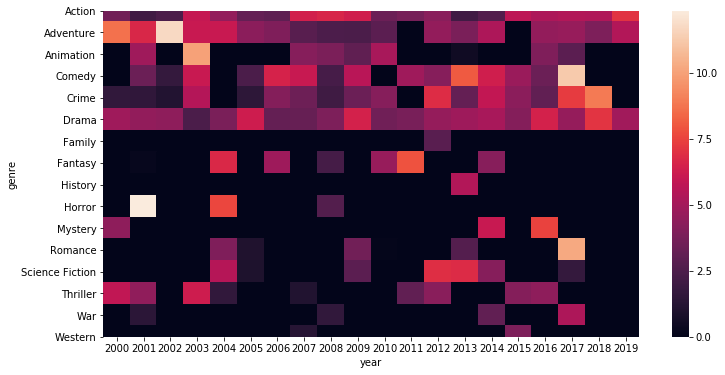

In [509]:
fig, ax = plt.subplots(figsize=(12, 6))
ax = sns.heatmap(dec3)

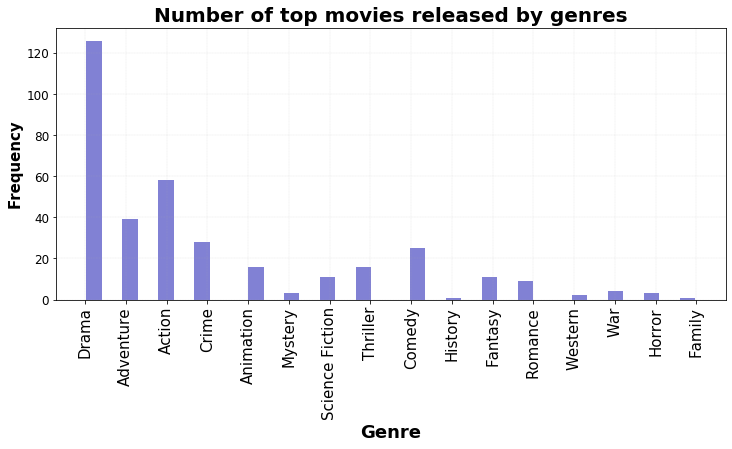

In [750]:
#df3['genre'].hist(bins=34, xrot = 90, color='#0504aa', alpha=0.5, rwidth=0.85, figsize=(12, 6))
# Set a clean upper x-axis limit.
#plt.xlim(xmax=20)
fig, ax = plt.subplots(figsize=(10, 5))
ax = df3['genre'].hist(bins=34, xrot = 90, color='#0504aa', alpha=0.5, rwidth=0.85, figsize=(12, 5));



plt.ylabel('Frequency', fontsize=15, fontweight='bold')
plt.title('Number of top movies released by genres',fontsize=20, fontweight='bold')
plt.grid(axis='both', alpha=0.5, linestyle='--', linewidth=0.3)
plt.xlabel('Genre', fontsize=18, fontweight='bold')
plt.xticks(fontsize=15)
plt.yticks(fontsize=12);
fig.savefig('Released.jpg', bbox_inches='tight')

In [538]:
df3.sort_values(by='imdb_rating', ascending=False)

,movieID,title,genres,director,actors,metascore,imdb_rating,imdbID,production,title,...,release_date,popularity,budget,genre,revenue,vote_avg,vote_count,imdbID,rev/bud_ratio,year
2,3,The Dark Knight,"Action, Crime, Drama, Thriller",Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart, M...",84.0,9.0,tt0468569,Warner Bros. Pictures/Legendary,The Dark Knight,...,2008-07-16,42.304,185000000.0,Drama,1.004560e+09,8.4,20399.0,tt0468569,5.430054,2008
4,5,The Lord of the Rings: The Return of the King,"Adventure, Drama, Fantasy",Peter Jackson,"Noel Appleby, Ali Astin, Sean Astin, David Aston",94.0,8.9,tt0167260,New Line Cinema,The Lord of the Rings: The Return of the King,...,2003-12-01,35.139,94000000.0,Adventure,1.118890e+09,8.4,14214.0,tt0167260,11.903085,2003
8,9,Inception,"Action, Adventure, Sci-Fi, Thriller",Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellen...",74.0,8.8,tt1375666,Warner Bros. Pictures,Inception,...,2010-07-15,45.299,160000000.0,Action,8.255330e+08,8.3,23847.0,tt1375666,5.159581,2010
10,11,The Lord of the Rings: The Fellowship of the Ring,"Adventure, Drama, Fantasy",Peter Jackson,"Alan Howard, Noel Appleby, Sean Astin, Sala Baker",92.0,8.8,tt0120737,New Line Cinema,The Lord of the Rings: The Fellowship of the Ring,...,2001-12-18,41.916,93000000.0,Adventure,8.713680e+08,8.3,15607.0,tt0120737,9.369548,2001
14,15,The Lord of the Rings: The Two Towers,"Adventure, Drama, Fantasy",Peter Jackson,"Bruce Allpress, Sean Astin, John Bach, Sala Baker",87.0,8.7,tt0167261,New Line Cinema,The Lord of the Rings: The Two Towers,...,2002-12-18,31.118,79000000.0,Adventure,9.262870e+08,8.3,13445.0,tt0167261,11.725152,2002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,937,Funny Games,"Crime, Drama, Thriller",Michael Haneke,"Naomi Watts, Tim Roth, Michael Pitt, Brady Corbet",44.0,6.5,tt0808279,Warner Independent Pictures,Funny Games,...,2007-10-20,10.882,15000000.0,Crime,7.938870e+06,6.5,1114.0,tt0808279,0.529258,2007
369,381,Ghost in the Shell,"Action, Drama, Sci-Fi, Thriller",Rupert Sanders,"Scarlett Johansson, Pilou Asbæk, Takeshi Kitan...",52.0,6.3,tt1219827,Paramount Pictures,Ghost in the Shell,...,2017-03-29,23.658,110000000.0,Action,1.698020e+08,6.0,5501.0,tt1219827,1.543655,2017
271,281,Solaris,"Drama, Mystery, Romance, Sci-Fi",Steven Soderbergh,"George Clooney, Natascha McElhone, Viola Davis...",65.0,6.2,tt0307479,20th Century Fox,Solaris,...,2002-11-27,10.331,47000000.0,Drama,3.000280e+07,6.0,697.0,tt0307479,0.638357,2002
401,413,Planet of the Apes,"Action, Adventure, Sci-Fi, Thriller",Tim Burton,"Mark Wahlberg, Tim Roth, Helena Bonham Carter,...",50.0,5.7,tt0133152,20th Century Fox,Planet of the Apes,...,2001-07-25,17.476,100000000.0,Thriller,3.622120e+08,5.7,2344.0,tt0133152,3.622120,2001


In [572]:
df3.columns

Index(['movieID', 'title', 'genres', 'director', 'actors', 'metascore',
       'imdb_rating', 'imdbID', 'production', 'title', 'movieID2',
       'release_date', 'popularity', 'budget', 'genre', 'revenue', 'vote_avg',
       'vote_count', 'imdbID', 'rev/bud_ratio', 'year'],
      dtype='object')

In [571]:
corr = np.corrcoef(pd.dropna(df['imdb_rating']), pd.dropna(df['rev/bud_ratio']))
# mask = np.zeros_like(corr)
# mask[np.triu_indices_from(mask)] = True
# with sns.axes_style("white"):
#     ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True)
corr

AttributeError: module 'pandas' has no attribute 'dropna'

In [554]:
rating = df3.groupby(['genre', 'year'])['imdb_rating'].mean().round(2).unstack().fillna('-')
rating

year,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
genre,,,,,,,,,,,,,,,,,,,,
Action,8.1,7.7,7.72,8.1,7.82,8.1,7.97,7.85,7.85,7.67,7.67,7.6,8.1,7.75,7.95,7.94,7.8,7.62,7.9,7.6
Adventure,7.8,8.07,8.7,8.3,7.9,7.45,8,7.85,7.7,7.7,7.65,-,7.85,7.8,8.07,-,7.58,7.8,8.2,8.2
Animation,-,8,-,8.1,-,-,-,8,8.05,8,7.87,-,-,8,-,-,7.9,8.1,-,-
Comedy,-,7.6,7.7,7.6,-,7.55,7.8,7.6,7.9,7.77,-,7.6,7.8,8,8,7.8,8,7.6,-,-
Crime,8.3,7.6,7.7,8.05,-,7.6,7.6,7.54,7.7,7.8,7.5,-,7.6,8.1,7.9,7.75,7.6,7.95,8.4,8.7
Drama,7.88,7.88,7.78,7.84,7.84,7.68,7.97,7.9,7.68,8.1,7.86,7.87,8.01,7.89,7.92,7.88,7.97,7.63,7.63,8.27
Family,-,-,-,-,-,-,-,-,-,-,-,-,7.7,-,-,-,-,-,-,-
Fantasy,-,8,-,-,7.75,-,7.9,-,7.8,-,7.85,7.9,-,-,7.8,-,-,-,-,-
History,-,-,-,-,-,-,-,-,-,-,-,-,-,8.2,-,-,-,-,-,-


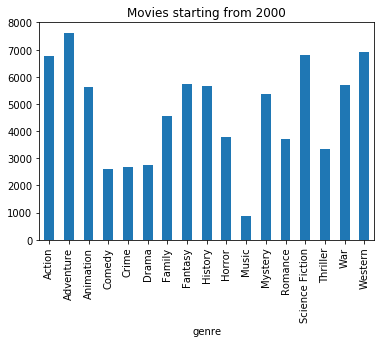

In [654]:
df_2.groupby('genre')['vote_count'].mean().plot(kind='bar', title='Movies starting from 2000');